# PCA
Principal Component Analysis

1. Obtener los datos
2. Generar la matriz de covarianza
3. Descomponer la matriz en eigenvalores y eigenvectores
4. Ordenar
5. Seleccionar los k elememtos
6. Generar la matriz W
7. Transformar el conjunto de datos X utilizando la matriz de proyeción W

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
, header=None)

In [52]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X.shape

(178, 13)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## 2. Matriz de Covarianzas y 3. Eigenvalores


In [8]:
# Matriz de covarianzas
cov_mat = np.cov(X_train_std.T)

# Eigenvalores, eigenvectores
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals:', eigen_vals)

Eigenvals: [4.83277535 2.6081345  1.39312759 0.95826494 0.86396711 0.52974173
 0.50692859 0.10045399 0.14993078 0.34751934 0.2305076  0.31501977
 0.26931978]


## 4. Ordenamiento 

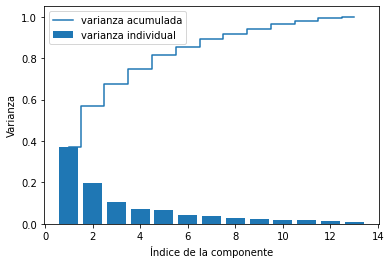

In [9]:
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, label='varianza individual', align='center')
plt.step(range(1, 14), cum_var_exp, where='mid', label='varianza acumulada')
plt.xlabel('Índice de la componente')
plt.ylabel('Varianza')
plt.legend(loc='best')
plt.show()

In [15]:
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i])
                for i in range(len(eigen_vals))
            ]
eigen_par.sort(key=lambda k: k[0], reverse=True)
#eigen_par

## 5. Selecccionar los k valores y 6. Generar matriz W

In [27]:
W = np.hstack((eigen_par[0][1][:, np.newaxis], eigen_par[1][1][:, np.newaxis])) #agregamos un eje para que nos deje en cada una de las filas uno  de los valores que acabamos de sacar
W

array([[ 0.07727559, -0.28686218],
       [-0.49622772, -0.24580577],
       [ 0.25203139, -0.09465469],
       [ 0.27834477, -0.05970778],
       [-0.02211267,  0.27541847],
       [ 0.08084924,  0.77691759],
       [ 0.04074745,  0.2023718 ],
       [ 0.08284477,  0.07964971],
       [-0.29751099,  0.12433938],
       [ 0.48630266,  0.02108578],
       [-0.19851103,  0.04003464],
       [-0.26706419, -0.0890129 ],
       [ 0.39434596, -0.30426868]])

## Transformar X

In [28]:
#aplicando un producto matricial 
print('Original', X_train_std[0])
print('Proyectado', X_train_std[0].dot(W))

Original [-1.2835372  -1.21342226 -1.2287381  -0.09416926 -0.96786881  0.15626342
  0.22487674 -0.41422064 -0.31023929 -1.14234013  1.89097793  0.67726639
 -1.49769949]
Proyectado [-1.43415011  1.06420408]


In [34]:
#Proyección del conjunto de entrenamiento
X_train_pca = X_train_std.dot(W)
X_train_pca.shape #nos quedamos solo con dos columnas de las 13 originales

(124, 2)

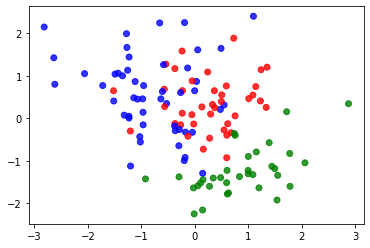

In [44]:
colors = np.array(['lime', 'red', 'blue', 'green'])
y = y_train[:, 0]
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.8, c=colors[y.astype(int)])
plt.show()

## Usando PCA de ScikitLearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

In [55]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train[:, 0])

LogisticRegression(solver='liblinear')

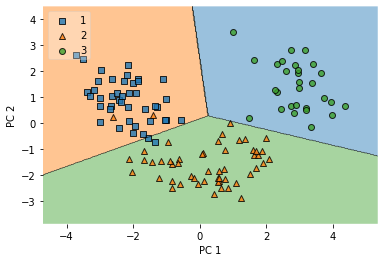

In [56]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train[:, 0].astype(np.integer), clf=lr, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

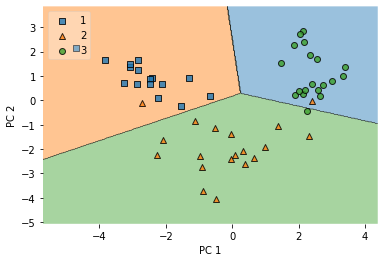

In [57]:
plot_decision_regions(X_test_pca, y_test[:, 0].astype(np.integer), clf=lr, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()